In [1]:
%run '/mnt/berger2/equipes/IGE/meom/workdir/berger2/fonctions/meom_fonctions/fonctions.ipynb'

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.netcdf as netcdf
import qgutils as qg
from matplotlib import ticker, cm
plt.ion()

In [2]:
#paramètres gravés dans le marbre pour le stage

Delta = 10000                               #grid spacing
f0 = 9.37456E-05                           #paramètre de Coriolis
dh = np.array([350,750,2900])              #hauteurs des couches océaniques
dh_b = np.array([(dh[0]+dh[1])/2,(dh[0]+dh[1])/2])
g_prime = np.array([2.5E-02,1.25E-02])     #gravités réduites aux interfaces
Beta = 1.75360E-11
delta_ek = 5                               #ocean bottom Ekman thickness 
nu4 = 2E09                                 #bi-harmonic viscosity
Ht = np.sum(dh)
Ht_b = np.sum(dh_b)
toc = np.array([1.31693E+01,1.81693E+01,2.41693E+01])
bf = delta_ek*f0/(2*dh[-1])
tran = 365*86400/(0.01**2)

#fréquences Brunt-vaisala

N_12 = g_prime[0]/((dh[0]+dh[1])/2)
N_23 = g_prime[1]/((dh[1]+dh[2])/2)
N2 = np.array([N_12,N_23])

In [3]:
dir_abs  = '/mnt/berger2/equipes/IGE/meom/workdir/berger2/qgcm-data/double_gyre_coupled/outdata_7_dt10/'
dir_rel  = '/mnt/berger2/equipes/IGE/meom/workdir/berger2/qgcm-data/double_gyre_coupled/outdata_6tdiff_dt10/'

file0 = 'ocpo.nc'
file1 = 'ocsst.nc'

In [4]:
#get fields psi
pfile_abs = dir_abs + file0
pfile_rel = dir_rel + file0

toc_file_abs = dir_abs + file1
toc_file_rel = dir_rel + file1


f_abs = netcdf.netcdf_file(dir_abs + file0,'r')
f_rel = netcdf.netcdf_file(dir_rel + file0,'r')


In [5]:
N2,f0 = qg.reshape3d(dh,N2,f0)

si_t = f_abs.variables['time'][:].copy().size
si_x = f_abs.variables['xp'][:-1].copy()
si_y = f_abs.variables['yp'][:-1].copy()

p = qg.read_qgcm(pfile_abs, 0, var='p', rescale = 1/f0, interp = True, subtract_bc = False )
nz,N,naux = p.shape

test = si_t

average = True

In [6]:
# flot moyen abs
flot_me = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/tableaux_termes_abs/termes_flot_moyen_abs.npz')
u_me_abs = flot_me['u_me']
v_me_abs = flot_me['v_me']

flot_me_bis = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/tableaux_termes_abs/etapes_flot_moyen_abs.npz')
         
p_me_abs = flot_me_bis['p_me']
b_me_abs = flot_me_bis['b_me']
w_me_abs = flot_me_bis['w_me']

#perturbations abs

flot_pert = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test//meom_test/Lorenz_cycle/cycle_termes_sep/tableaux_termes_exch/termes_abs.npz')

mpe2epe_me_abs = flot_pert['mpe2epe_me_abs']
epe2mpe_me_abs = flot_pert['epe2mpe_me_abs']
mke2eke_me_abs = flot_pert['mke2eke_me_abs']
eke2mke_me_abs = flot_pert['eke2mke_me_abs']
#w_b_me_abs = flot_pert['w_b_me_abs']
#p_w_me_abs = flot_pert['p_w_me_abs']

In [7]:
#flot moyen rel
flot_me = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/tableaux_termes_rel/termes_flot_moyen_rel.npz')
u_me_rel = flot_me['u_me']
v_me_rel = flot_me['v_me']

flot_me_bis = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/tableaux_termes_rel/etapes_flot_moyen_rel.npz')
         
p_me_rel = flot_me_bis['p_me']
b_me_rel = flot_me_bis['b_me']
w_me_rel = flot_me_bis['w_me']

flot_pert = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test//meom_test/Lorenz_cycle/cycle_termes_sep/tableaux_termes_exch/termes_rel.npz')

mpe2epe_me_rel = flot_pert['mpe2epe_me_rel']
epe2mpe_me_rel = flot_pert['epe2mpe_me_rel']
mke2eke_me_rel = flot_pert['mke2eke_me_rel']
eke2mke_me_rel = flot_pert['eke2mke_me_rel']
#w_b_me_rel = flot_pert['w_b_me_rel']
#p_w_me_rel = flot_pert['p_w_me_rel']

In [8]:
#import trucs sup
flot_sup = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/cycle_termes_sep/tableaux_termes_exch/termes_rec.npz')

rec_pe_abs = flot_sup['rec_pe_abs']
rec_pe_rel = flot_sup['rec_pe_rel']
rec_pe_abs_bis = flot_sup['rec_pe_abs_bis']
rec_pe_rel_bis = flot_sup['rec_pe_rel_bis']
rec_pe_abs_i = flot_sup['rec_pe_abs_i']
rec_pe_rel_i = flot_sup['rec_pe_rel_i']

In [10]:
zero = np.zeros((1,N,naux))
w_me_abs_use = np.concatenate((zero,w_me_abs,zero), axis=0)

#calcul termes abs


mpe2mke_abs = w_me_abs*b_me_abs

#epe2eke_abs = w_b_me_abs

mke2mpe_abs = f0*p_me_abs*div_z(w_me_abs_use,dh,f0)

#eke2epe_abs = f0*p_w_me_abs



In [11]:
zero = np.zeros((1,N,naux))
w_me_rel_use = np.concatenate((zero,w_me_rel,zero), axis=0)

#calcul termes

mpe2mke_rel = w_me_rel*b_me_rel

#epe2eke_rel = w_b_me_rel

mke2mpe_rel = f0*p_me_rel*div_z(w_me_rel_use,dh,f0)

#eke2epe_rel = f0*p_w_me_rel

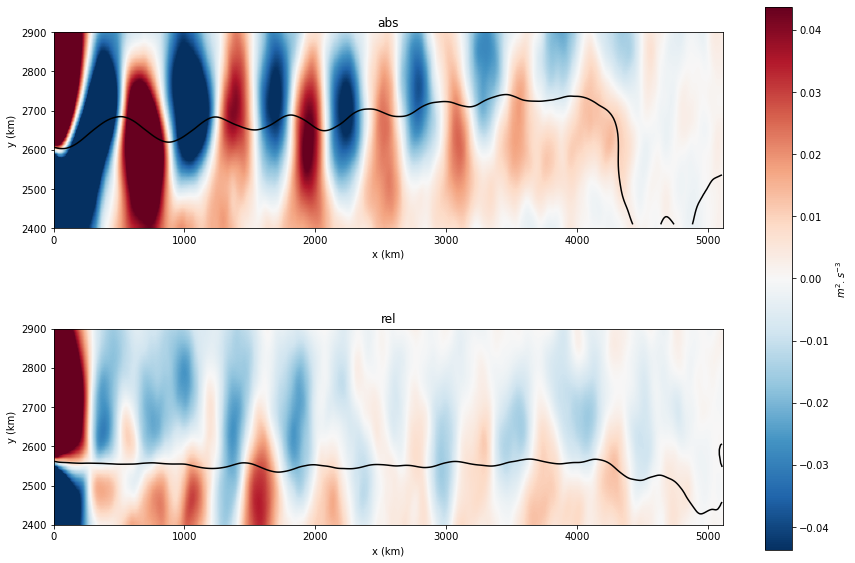

In [14]:
#vitesse meridionale (assez stylé)

v_me_abs_i = integral_z(v_me_abs,dh,Delta,Ht)
v_me_rel_i = integral_z(v_me_rel,dh,Delta,Ht)

maxi = max(np.max(v_me_abs_i),np.abs(np.min(v_me_abs_i)))


fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (15,10))

col = ax1.imshow(v_me_abs_i[210:260,:], extent= [0,5120,2400,2900], cmap='RdBu_r', vmax = maxi/10, vmin = -maxi/10)
ax1.contour(si_x,-si_y[210:260]+5000, p_me_abs[0,210:260,:],levels = 0, colors= 'black')
ax1.set_aspect(aspect=3)
ax1.set_title('abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

col2 = ax2.imshow(v_me_rel_i[210:260,:], extent= [0,5120,2400,2900], cmap='RdBu_r', vmax = maxi/10, vmin = -maxi/10)
ax2.contour(si_x,-si_y[210:260]+5000, p_me_rel[0,210:260,:],levels = 0, colors= 'black')
ax2.set_aspect(aspect=3)
ax2.set_title('rel')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')


m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(v_me_abs_i)
m2.set_clim(-maxi/10, maxi/10)
plt.colorbar(m2, ax= (ax1,ax2)).set_label(r'$m^2.s^{-3}$')

#plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/cycle_termes_sep/figs_termes_exch/v_me.png')

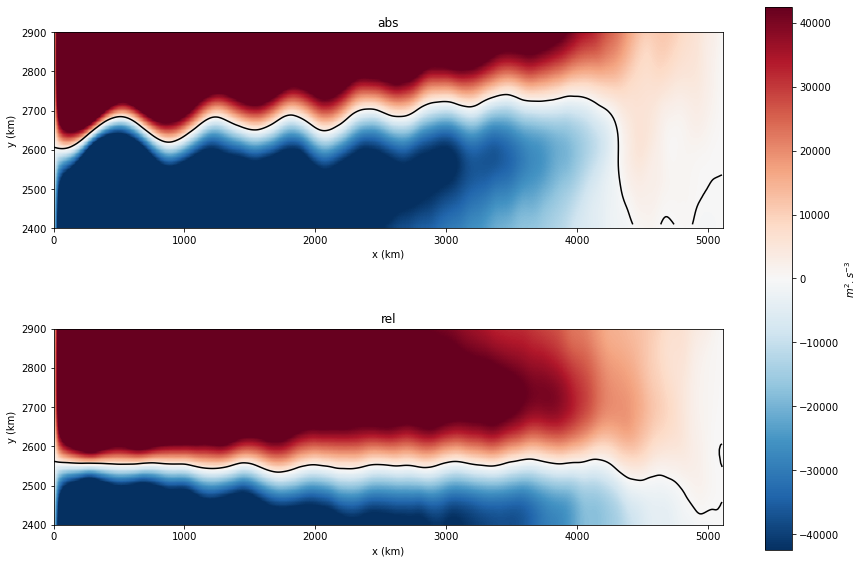

In [65]:


maxi = max(np.max(p_me_abs[0]),np.abs(np.min(p_me_abs[0])))


fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (15,10))

col = ax1.imshow(p_me_abs[0,210:260,:], extent= [0,5120,2400,2900], cmap='RdBu_r', vmax = maxi/3, vmin = -maxi/3)
ax1.contour(si_x,-si_y[210:260]+5000, p_me_abs[0,210:260,:],levels = 0, colors= 'black')
ax1.set_aspect(aspect=3)
ax1.set_title('abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

col2 = ax2.imshow(p_me_rel[0,210:260,:], extent= [0,5120,2400,2900], cmap='RdBu_r', vmax = maxi/3, vmin = -maxi/3)
ax2.contour(si_x,-si_y[210:260]+5000, p_me_rel[0,210:260,:],levels = 0, colors= 'black')
ax2.set_aspect(aspect=3)
ax2.set_title('rel')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')

m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(p_me_abs[0])
m2.set_clim(-maxi/3, maxi/3)
plt.colorbar(m2, ax = (ax1 ,ax2)).set_label(r'$m^2.s^{-3}$')

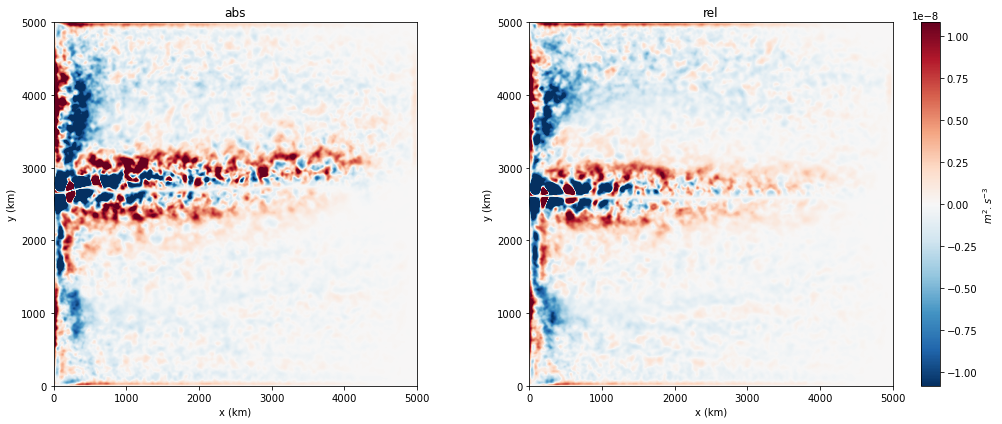

In [44]:
#MPE to EPE, MPE perspective

mpe2epe_abs_i = integral_z(mpe2epe_me_abs, dh, Delta, Ht)
mpe2epe_rel_i = integral_z(mpe2epe_me_rel, dh, Delta, Ht)

maxi = max(np.max(mpe2epe_abs_i),np.abs(np.min(mpe2epe_abs_i)))


fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,6),tight_layout=True)


col = ax1.imshow(mpe2epe_abs_i, extent= [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/20, vmin = -maxi/20)
ax1.set_aspect('equal')
ax1.set_title('abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')


col2 = ax2.imshow(mpe2epe_rel_i, extent= [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/20, vmin = -maxi/20)
ax2.set_aspect('equal')
ax2.set_title('rel')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')

m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(mpe2epe_rel_i)
m2.set_clim(-maxi/20, maxi/20)
plt.colorbar(m2, ax= ax2).set_label(r'$m^2.s^{-3}$')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/cycle_termes_sep/figs_termes_exch/mpe2epe.png')

In [20]:
print('abs:',qg.integral(mpe2epe_me_abs,dh,Delta,average)*tran)
print('rel:',qg.integral(mpe2epe_me_rel,dh,Delta,average)*tran)

abs: -71.88189029463211
rel: -85.56430077188453


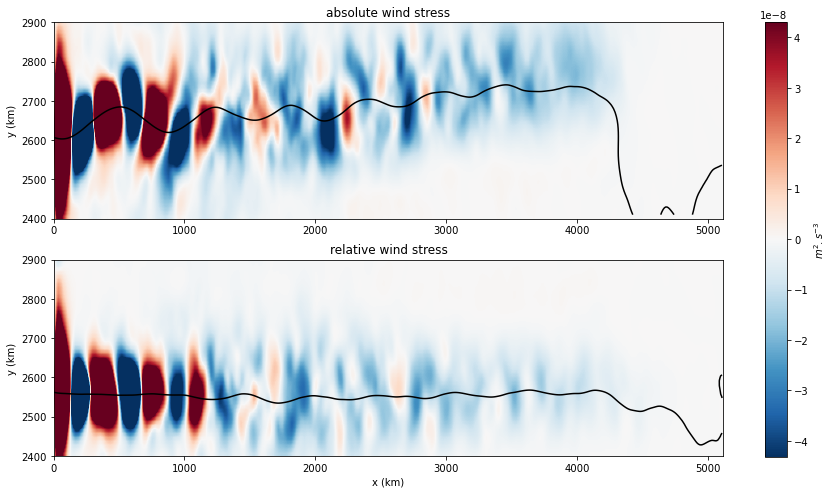

In [64]:
#MPE to EPE, EPE perspective

epe2mpe_abs_i = -integral_z(epe2mpe_me_abs, dh, Delta, Ht)
epe2mpe_rel_i = -integral_z(epe2mpe_me_rel, dh, Delta, Ht)

maxi = max(np.max(epe2mpe_abs_i),np.abs(np.min(epe2mpe_abs_i)))


fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (15,8))


col = ax1.imshow(epe2mpe_abs_i[210:260], extent= [0,5120,2400,2900], cmap='RdBu_r', vmax = maxi/20, vmin = -maxi/20)
ax1.contour(si_x,-si_y[210:260]+5000, p_me_abs[0,210:260,:],levels = 0, colors= 'black')
ax1.set_aspect(aspect=3)
ax1.set_title('absolute wind stress')
#ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

col2 = ax2.imshow(epe2mpe_rel_i[210:260], extent= [0,5120,2400,2900], cmap='RdBu_r', vmax = maxi/20, vmin = -maxi/20)
ax2.contour(si_x,-si_y[210:260]+5000, p_me_rel[0,210:260,:],levels = 0, colors= 'black')
ax2.set_aspect(aspect=3)
ax2.set_title('relative wind stress')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')

#cax = plt.axes([1, 0.05, 0.035, 0.9])

m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(epe2mpe_rel_i)
m2.set_clim(-maxi/20, maxi/20)
plt.colorbar(m2,ax = (ax1 ,ax2)).set_label(r'$m^2.s^{-3}$')

#savefig
#plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/cycle_termes_sep/figs_termes_exch/epe2mpe.png')

In [36]:
print('abs:',qg.integral(-epe2mpe_me_abs,dh,Delta,average=True)*tran)
print('rel:',qg.integral(-epe2mpe_me_rel,dh,Delta,average=True)*tran)

abs: 73.2314198731779
rel: 86.71068286218562


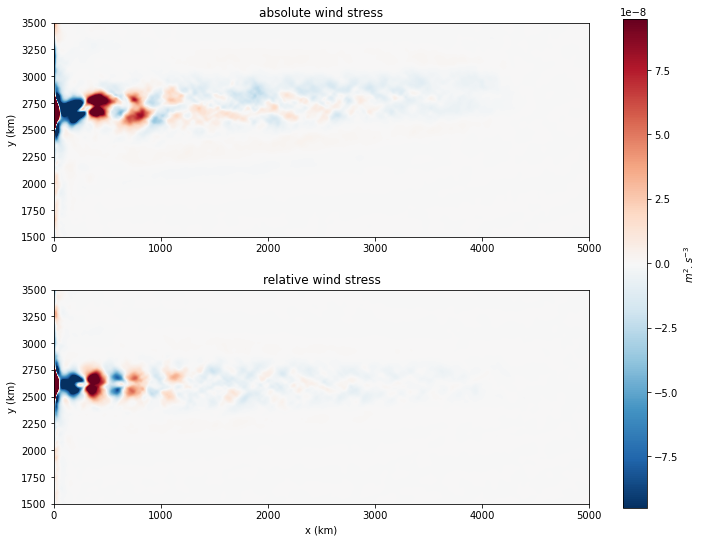

In [22]:
#MKE to EKE, MKE perspective (wrong perspective, corrected in the saving)

mke2eke_abs_i = -integral_z(mke2eke_me_abs, dh, Delta, Ht)
mke2eke_rel_i = -integral_z(mke2eke_me_rel, dh, Delta, Ht)

maxi = max(np.max(mke2eke_abs_i),np.abs(np.min(mke2eke_abs_i)))


fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (12,9))


col = ax1.imshow(mke2eke_abs_i[153:359], extent= [0,5000,1500,3500], cmap='RdBu_r', vmax = maxi/60, vmin = -maxi/60)
ax1.set_aspect('equal')
ax1.set_title('absolute wind stress')
#ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

col2 = ax2.imshow(mke2eke_rel_i[153:359], extent= [0,5000,1500,3500], cmap='RdBu_r', vmax = maxi/60, vmin = -maxi/60)
ax2.set_aspect('equal')
ax2.set_title('relative wind stress')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')

m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(mke2eke_rel_i)
m2.set_clim(-maxi/60, maxi/60)
plt.colorbar(m2,ax=(ax1,ax2)).set_label(r'$m^2.s^{-3}$')

plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/cycle_termes_sep/figs_termes_exch/eke2mke.png')

In [12]:
print('abs:',-qg.integral(mke2eke_me_abs,dh,Delta,average)*tran)
print('rel:',-qg.integral(mke2eke_me_rel,dh,Delta,average)*tran)

abs: 168.09681480931965
rel: 125.44575412990618


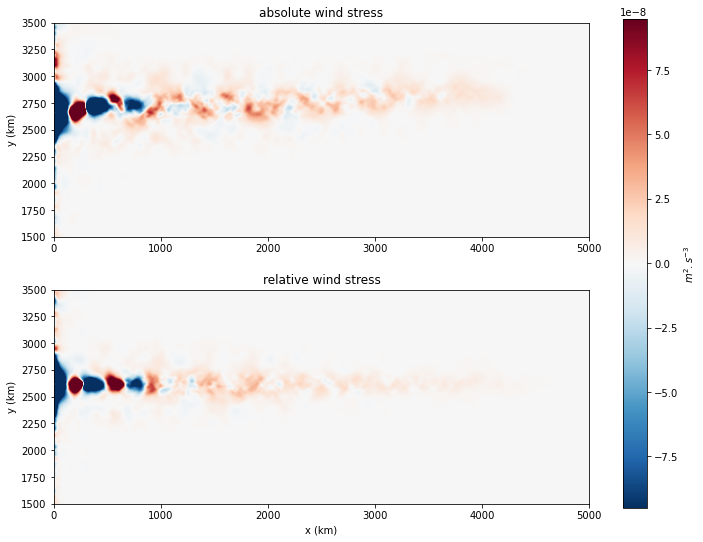

In [23]:
#MKE to EKE, EKE perspective (wrong perspective, corrected in the saving)

eke2mke_abs_i = -integral_z(eke2mke_me_abs, dh, Delta, Ht)
eke2mke_rel_i = -integral_z(eke2mke_me_rel, dh, Delta, Ht)

#maxi = max(np.max(eke2mke_abs_i),np.abs(np.min(eke2mke_abs_i)))


fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (12,9))


col = ax1.imshow(eke2mke_abs_i[153:359], extent= [0,5000,1500,3500], cmap='RdBu_r', vmax = maxi/60, vmin = -maxi/60)
ax1.set_aspect('equal')
ax1.set_title('absolute wind stress')
#ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

col2 = ax2.imshow(eke2mke_rel_i[153:359], extent= [0,5000,1500,3500], cmap='RdBu_r', vmax = maxi/60, vmin = -maxi/60)
ax2.set_aspect('equal')
ax2.set_title('relative wind stress')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')

m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(eke2mke_rel_i)
m2.set_clim(-maxi/60, maxi/60)
plt.colorbar(m2,ax=(ax1,ax2)).set_label(r'$m^2.s^{-3}$')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/cycle_termes_sep/figs_termes_exch/mke2eke.png')

In [17]:
print('abs:',qg.integral(eke2mke_me_abs,dh,Delta,average)*tran)
print('rel:',qg.integral(eke2mke_me_rel,dh,Delta,average)*tran)

abs: 190.71188789892997
rel: 141.69885733070674


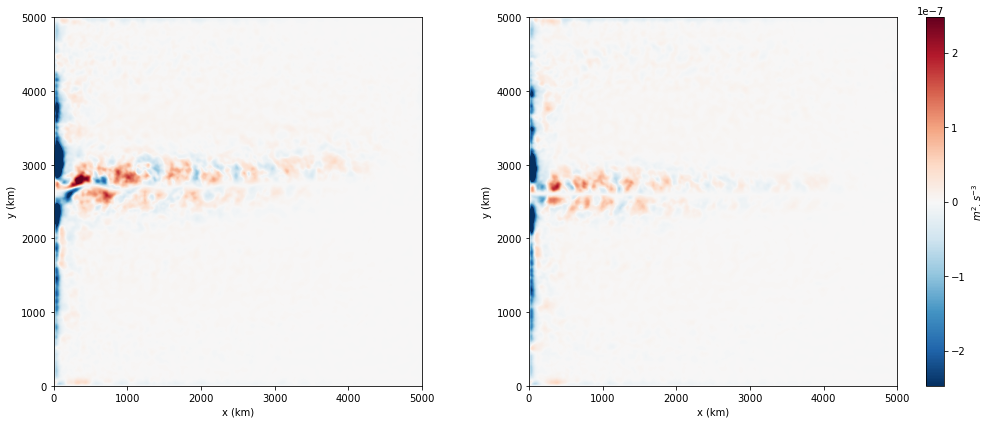

In [38]:

mpe2mke_abs_i = -integral_z(mpe2mke_abs, dh, Delta, Ht_b)
mpe2mke_rel_i = -integral_z(mpe2mke_rel, dh, Delta, Ht_b)

maxi = max(np.max(mpe2mke_abs_i),np.abs(np.min(mpe2mke_abs_i)))


fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,6),tight_layout=True)


col = ax1.imshow(mpe2mke_abs_i, extent= [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/4, vmin = -maxi/4)
ax1.set_aspect('equal')
#ax1.set_title('abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

col2 = ax2.imshow(mpe2mke_rel_i, extent= [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/4, vmin = -maxi/4)
ax2.set_aspect('equal')
#ax2.set_title('rel')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')

m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(mpe2mke_rel_i)
m2.set_clim(-maxi/4, maxi/4)
plt.colorbar(m2, ax= ax2).set_label(r'$m^2.s^{-3}$')

#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/cycle_termes_sep/figs_termes_exch/mpe2mke.png')

In [34]:
print('abs:',qg.integral(mpe2mke_abs[:,:,:],dh,Delta,average)*tran)
print('rel:',qg.integral(mpe2mke_rel[:,:,:],dh,Delta,average)*tran)

abs: 41.023718610886
rel: 20.821342416657206


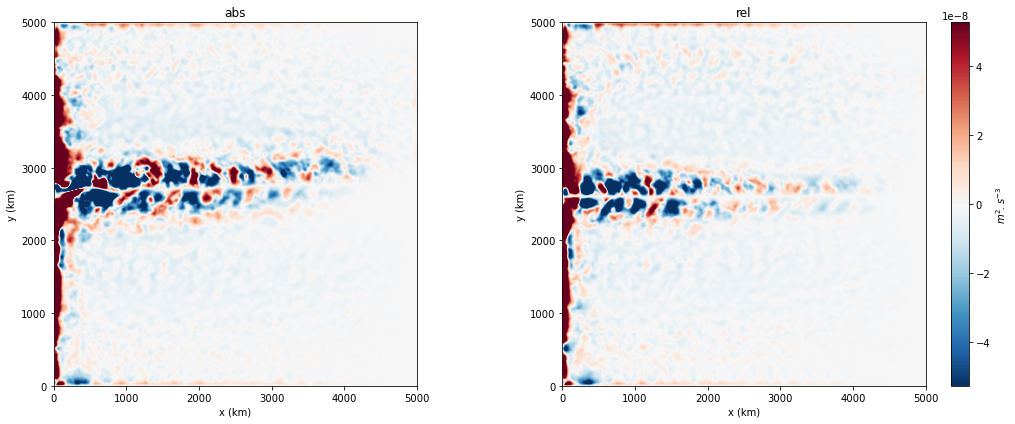

In [66]:


mke2mpe_abs_i = -integral_z(mke2mpe_abs, dh, Delta, Ht_b)
mke2mpe_rel_i = -integral_z(mke2mpe_rel, dh, Delta, Ht_b)

maxi = max(np.max(mke2mpe_abs_i),np.abs(np.min(mke2mpe_abs_i)))


fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,6),tight_layout=True)


col = ax1.imshow(mke2mpe_abs_i, extent= [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/20, vmin = -maxi/20)
ax1.set_aspect('equal')
ax1.set_title('abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

col2 = ax2.imshow(mke2mpe_rel_i, extent= [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/20, vmin = -maxi/20)
ax2.set_aspect('equal')
ax2.set_title('rel')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')

m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(mke2mpe_rel_i)
m2.set_clim(-maxi/20, maxi/20)
plt.colorbar(m2, ax= ax2).set_label(r'$m^2.s^{-3}$')

#savefig
#plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/cycle_termes_sep/figs_termes_exch/mke2mpe.png')

In [67]:
print('abs:',qg.integral(mke2mpe_abs,dh,Delta,average)*tran)
print('rel:',qg.integral(mke2mpe_rel,dh,Delta,average)*tran)

abs: -41.02371861088602
rel: -20.82134241665721


In [68]:
#the minus before the integral is for convention purpose

epe2eke_abs_i = -integral_z(epe2eke_abs, dh, Delta, Ht_b)
epe2eke_rel_i = -integral_z(epe2eke_rel, dh, Delta, Ht_b)

maxi = max(np.max(epe2eke_abs_i),np.abs(np.min(epe2eke_abs_i)))


fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,6),tight_layout=True)


col = ax1.imshow(epe2eke_abs_i, extent= [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/10, vmin = -maxi/10)
ax1.set_aspect('equal')
ax1.set_title('abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

col2 = ax2.imshow(epe2eke_rel_i, extent= [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/10, vmin = -maxi/10)
ax2.set_aspect('equal')
ax2.set_title('rel')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')

m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(epe2eke_rel_i)
m2.set_clim(-maxi/10, maxi/10)
plt.colorbar(m2, ax= ax2).set_label(r'$m^2.s^{-3}$')

#savefig
#plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/cycle_termes_sep/figs_termes_exch/epe2eke.png')

NameError: name 'epe2eke_abs' is not defined

In [ ]:
print('abs:',qg.integral(epe2eke_abs,dh,Delta,average)*tran)
print('rel:',qg.integral(epe2eke_rel,dh,Delta,average)*tran)

In [69]:
#the minus before the integral is pfor convention purpose

eke2epe_abs_i = -integral_z(eke2epe_abs, dh, Delta, Ht_b)
eke2epe_rel_i = -integral_z(eke2epe_rel, dh, Delta, Ht_b)

maxi = max(np.max(eke2epe_abs_i),np.abs(np.min(eke2epe_abs_i)))


fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,6),tight_layout=True)


col = ax1.imshow(eke2epe_abs_i, extent= [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/10, vmin = -maxi/10)
ax1.set_aspect('equal')
ax1.set_title('abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

col2 = ax2.imshow(eke2epe_rel_i, extent= [0,5000,0,5000], cmap='RdBu_r', vmax = maxi/10, vmin = -maxi/10)
ax2.set_aspect('equal')
ax2.set_title('rel')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')

m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(eke2epe_rel_i)
m2.set_clim(-maxi/10, maxi/10)
plt.colorbar(m2, ax= ax2).set_label(r'$m^2.s^{-3}$')
#savefig
plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/meom_test/Lorenz_cycle/cycle_termes_sep/figs_termes_exch/eke2epe.png')

NameError: name 'eke2epe_abs' is not defined

print('abs:',qg.integral(eke2epe_abs,dh,Delta,average)*tran)
print('rel:',qg.integral(eke2epe_rel,dh,Delta,average)*tran)